# Resolução exercício Telecom parte A

## Localização antena A B C

### Instalação e carregamento das bibliotecas de GA em python

In [1]:
!pip install deap

     |████████████████████████████████| 163kB 3.5MB/s 


In [7]:
import random
import numpy
from deap import base
from deap import creator
from deap import tools
from deap import algorithms
import math

### Declaração das funções auxiliares que devem conter as informações do problema

In [2]:
# Função Objetivo -> Repare que o único parametro que a função deve receber é um individuo
def LucroClientes(individual):
  xA = individual[0]
  yA = individual[1]
  xB = individual[2]
  yB = individual[3]
  xC = individual[4]
  yC = individual[5]
  alcanceA = 15
  alcanceB = 12
  alcanceC = 3
  cidadesAtendidasAntenaA = []
  cidadesAtendidasAntenaB = []
  cidadesAtendidasAntenaC = []
  cidadesAtendidas = []
  clientesPorCidade = [7571, 5274, 11082, 11879, 9226, 7942, 6295, 4286, 8132, 11344]
  localizacaoCidades = [(18, 42), (29, 37), (36, 28), (35, 11), (28, 7), (21,15), (8, 26), (18, 31), (6, 4), (50, 46)]
  soma_clientes = 0        
  for localizacaoCidade in localizacaoCidades:
    if((math.sqrt(((xA-localizacaoCidade[0])**2) + ((yA-localizacaoCidade[1])**2)) <= alcanceA)):
      cidadesAtendidasAntenaA.append(1)
    else:
      cidadesAtendidasAntenaA.append(0)
    if((math.sqrt(((xB-localizacaoCidade[0])**2) + ((yB-localizacaoCidade[1])**2)) <= alcanceB)):
      cidadesAtendidasAntenaB.append(1)
    else:
      cidadesAtendidasAntenaB.append(0)
    if((math.sqrt(((xC-localizacaoCidade[0])**2) + ((yC-localizacaoCidade[1])**2)) <= alcanceC)):
      cidadesAtendidasAntenaC.append(1)
    else:
      cidadesAtendidasAntenaC.append(0)
  for i in range(len(cidadesAtendidasAntenaA)):
    if((cidadesAtendidasAntenaA[i] == 1) or (cidadesAtendidasAntenaB[i] == 1) or (cidadesAtendidasAntenaC[i] == 1)):
      cidadesAtendidas.append(True)
    else:
      cidadesAtendidas.append(False)
  i = 0
  for cidadeAtendida in cidadesAtendidas:
    if(cidadeAtendida):
      soma_clientes = soma_clientes + clientesPorCidade[i]
    i = i + 1
  return soma_clientes

In [4]:
# Função de restrição que o problema tiver (nem todos os problemas contém restrições)
def FuncaoDeRestricao(individual):
  return True

In [5]:
# Função utilizada para gerar os individuos -> Repare que não há nenhum mistério, os valores v1 e v2 utilizam a função que é passada por parâmetro que por sua vez
# é uma função que gera numeros aleatorios inteiros entre 0 e 50, como está declarado mais abaixo
# outro ponto importante é como fazer a declaração do cromossomo, procure sempre utilizar tal forma como está decrito, para cada valor, adicionar (append) o mesmo ao cromossomo
# GeradorDeIndividuos(ClasseDoIndividuo, FunçãoDeGeraçãoDeNºAleatorio):
def GeradorDeIndividuos(icls, attr_bool_function):
  i = 0
  cromossomo = list()
  # while True: 
  v1 = attr_bool_function()
  v2 = attr_bool_function()
  v3 = attr_bool_function()
  v4 = attr_bool_function()
  v5 = attr_bool_function()
  v6 = attr_bool_function()
    # if FuncaoDeRestricao(v1, v2, v3, v4, v5, v6):
    #   break
    # i = i + 1
  cromossomo.append(v1)
  cromossomo.append(v2)
  cromossomo.append(v3)
  cromossomo.append(v4)
  cromossomo.append(v5)
  cromossomo.append(v6)
  return icls(cromossomo)

### Declaração dos pacotes referentes a biblioteca do GA: 
#### Nomenclatura referente a biblioteca e deve-se alterar somente os pesos das funções que deverão ser, ou maximizada ou minimizada
#### Pode-se alterar também o tipo da variavel do Individuo. Mas que, geralmente, é uma lista de numeros inteiros

In [8]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

In [9]:
toolbox = base.Toolbox()
# Definir o gerador de numeros aleatórios de numeros inteiros entre o intervalo (0 e 50)
toolbox.register("attr_bool", random.randint, 0, 50)
# Inicialização do cromossomo (quantos genes o cromossomo deve possuir)
#toolbox.register("individualCreator", GeradorDeIndividuos, toolbox.attr_bool)
toolbox.register("individual", GeradorDeIndividuos, creator.Individual, toolbox.attr_bool)
#toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, 2)
# Registro do individuo na população
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
# Registro do nome da função objetivo
toolbox.register("evaluate", LucroClientes)
# Registro de qual o tipo de cruzamento deve ser utilizado (cruzamento de 2 pontos)
toolbox.register("mate", tools.cxTwoPoint)
# Registro de qual tipo de mutação deve ser utilizado (probabilidade de um individuo sofrer mutação)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.15)
# Registro de qual o tipo do método de seleção que será utilizado
toolbox.register("select", tools.selBest)

## Chamada efetiva do GA para resolução

In [10]:
population = toolbox.population(n=40)
# quantidade de gerações
NGEN=35
bestIndEachGeneration = []
bestInd = []
for gen in range(NGEN):
  print("Geracao: ", gen)
  offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.1)
  fits = list(toolbox.map(toolbox.evaluate, offspring))
  
  indexes = range(len(offspring))
  indexes = [x for _,x in sorted(zip(fits, indexes))]
  fits = [fits[x] for x in indexes]
  offspring = [offspring[x] for x in indexes]
  print(offspring)
  print(fits)
  for fit, ind in zip(fits, offspring):
    ind.fitness.wvalues = fit
  elites_ind = offspring[:max(1, round(0.15*len(offspring)))]
  population = toolbox.select(offspring, len(population)-len(elites_ind))
  population.extend(elites_ind)
  bestIndEachGeneration.append([offspring[fits.index(max(fits))], max(fits)])
  bestInd.append(max(bestIndEachGeneration, key=lambda t:t[1])[1])
  print(" Melhor Avaliação dessa geração: ", bestIndEachGeneration[-1][1], "\n", 
        "Melhor Avaliação Geral", max(bestIndEachGeneration, key=lambda t:t[1])[1], "\n",
        "Da geração: ", bestIndEachGeneration.index(max(bestIndEachGeneration, key=lambda t:t[1])), "\n",
        "Cromossomo: ", max(bestIndEachGeneration, key=lambda t:t[1])[0], "\n"
       )

Geracao:  0
[[14, 0, 0, 3, 47, 11], [4, 8, 12, 1, 35, 23], [1, 40, 47, 39, 10, 1], [20, 49, 49, 33, 9, 13], [5, 12, 0, 20, 42, 42], [20, 49, 3, 28, 1, 37], [13, 49, 42, 13, 25, 11], [31, 32, 30, 46, 1, 19], [25, 47, 12, 6, 13, 0], [17, 30, 46, 19, 16, 14], [17, 42, 15, 28, 6, 25], [8, 39, 19, 32, 16, 4], [0, 6, 21, 15, 30, 25], [22, 32, 38, 49, 38, 35], [39, 46, 20, 39, 44, 12], [4, 41, 38, 9, 13, 49], [21, 12, 23, 8, 41, 6], [26, 11, 47, 16, 6, 19], [25, 6, 36, 50, 12, 0], [28, 10, 47, 0, 14, 45], [28, 3, 47, 8, 20, 38], [28, 0, 0, 0, 30, 9], [35, 22, 3, 22, 0, 41], [41, 47, 11, 33, 5, 9], [20, 22, 37, 27, 39, 3], [9, 23, 43, 39, 30, 43], [39, 6, 42, 39, 11, 43], [23, 19, 4, 43, 34, 41], [19, 47, 34, 2, 4, 30], [17, 16, 47, 28, 2, 32], [22, 6, 18, 47, 50, 16], [34, 22, 3, 33, 13, 44], [18, 15, 27, 38, 32, 47], [24, 1, 27, 41, 15, 3], [17, 3, 24, 35, 18, 13], [16, 28, 32, 28, 37, 28], [21, 30, 47, 37, 30, 20], [39, 32, 31, 14, 29, 4], [28, 41, 28, 11, 8, 43], [23, 29, 41, 6, 49, 41]]
[

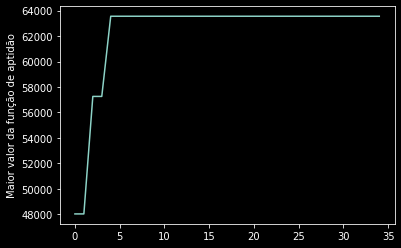

In [11]:
from matplotlib import style
style.use('dark_background')
import matplotlib.pyplot as plt
plt.plot(bestInd)
plt.ylabel('Maior valor da função de aptidão')
plt.show()